# `correlations`

Here, we display the large data set in two different ways, first as a heat map with custom color scales, and then as a bar chart with error bars. 

In [1]:
%matplotlib inline
import pandas 
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import rc 
#import seaborn as sns

rc( 'font', family='Source Sans Pro' )
plt.style.use( 'bmh' ) 

In [3]:
df = pandas.read_csv( 'data_set/targets.csv', index_col=0 ) 
df.head()

,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
mutant,,,,,,,,,,,,,,,,,,,,,
G12N,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.0,0,NaN,NaN,NaN,NaN,0.962179
S14A,14.0,1,40.16,-1.72,0.30,0.37,320.0,11.0,8.25,1.02,...,NaN,NaN,NaN,9.0,1,0.23,-0.439333,-0.217484,-0.651460,0.157390
T15A,15.0,1,39.17,-0.58,0.23,0.07,614.0,14.7,5.30,0.48,...,NaN,NaN,NaN,2.0,1,-0.76,-0.156314,-0.025306,-0.176657,0.615834
S16A,16.0,1,39.41,-0.83,0.27,0.16,154.0,1.0,14.01,0.40,...,NaN,NaN,NaN,5.0,1,-0.52,-0.756962,-0.447468,-1.199275,0.402336
S16N,16.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,0,NaN,NaN,NaN,NaN,0.402336


## Correlations between measurements 

First, let's visualize the changes that occur for each mutation

In [10]:
df.corr()[ 'target_tm' ][ [ 'target_kcat', 'target_km', 'target_kcatkm' ] ]

target_kcat     -0.207401
target_km       -0.072785
target_kcatkm   -0.208778
Name: target_tm, dtype: float64

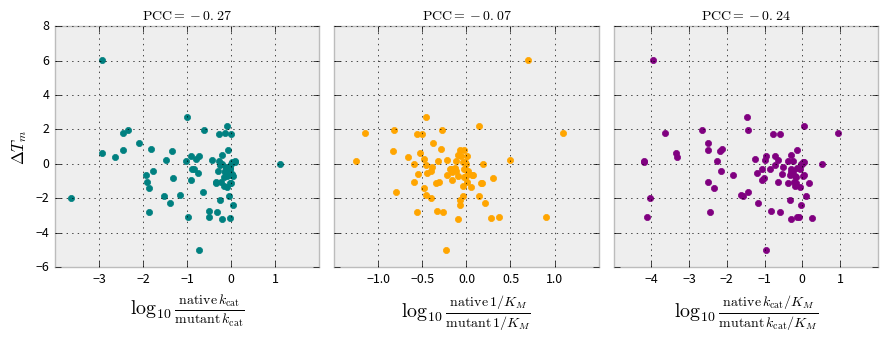

In [4]:
fig, ax = plt.subplots( nrows=1, ncols=3, figsize=(9,3.6), sharey=True )

ax[0].scatter( df.target_kcat, df.target_tm, color='teal' )
ax[0].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, k_\mathrm{{cat}} }{ \mathrm{mutant} \, k_\mathrm{{cat}} }$', fontsize='x-large' )
ax[0].set_ylabel( r'$\Delta T_m$' )
ax[0].set_xticks( ax[0].get_xticks()[1:-1] )
#ax[0].set_yticks( ( -6, -3, 0, 3, 6 ) )
ax[0].set_title( '$\mathrm{PCC} = -0.27$', fontsize='medium' )

ax[1].scatter( df.target_km, df.target_tm, color='orange' )
ax[1].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, 1/K_M }{ \mathrm{mutant} \, 1/K_M }$', fontsize='x-large'  )
ax[1].set_xticks( ax[1].get_xticks()[1:-1] )
ax[1].set_title( '$\mathrm{PCC} = -0.07$' , fontsize='medium' )

ax[2].scatter( df.target_kcatkm, df.target_tm, color='purple' )
ax[2].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, k_\mathrm{{cat}}/K_M }{ \mathrm{mutant} \, k_\mathrm{{cat}}/K_M }$', fontsize='x-large' )
ax[2].set_xticks( ax[2].get_xticks()[1:-1] )
ax[2].set_title( '$\mathrm{PCC} = -0.24$', fontsize='medium' )

fig.tight_layout()

## Correlations between experimental data and conservation 

Absolute values for the experimental data 

In [11]:
df.corr()[ 'conserved' ][ [ 'target_kcat', 'target_km', 'target_kcatkm', 'target_tm' ] ]

target_kcat     -0.706684
target_km       -0.162052
target_kcatkm   -0.694276
target_tm        0.307542
Name: conserved, dtype: float64

(array([  1.,   2.,   4.,   7.,   5.,   8.,  12.,  36.,   0.,   1.]),
 array([-3.64345268, -3.169373  , -2.69529332, -2.22121365, -1.74713397,
        -1.27305429, -0.79897462, -0.32489494,  0.14918474,  0.62326441,
         1.09734409]),
 <a list of 10 Patch objects>)

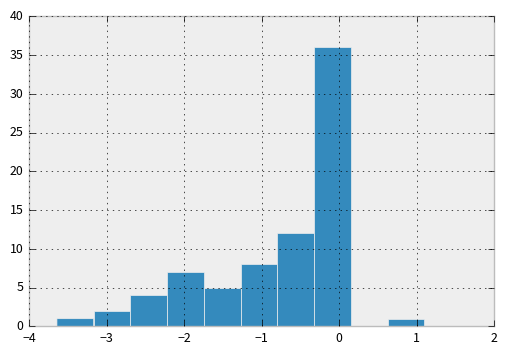

In [23]:
plt.hist( df.target_kcat, range=(df.target_kcat.min(), df.target_kcat.max()) ) 

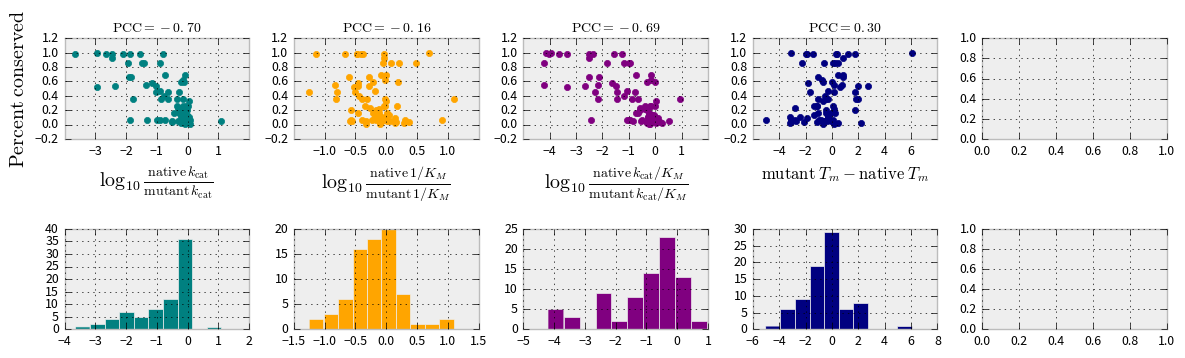

In [34]:
#plt.style.use( 'ggplot' )
fig, ax = plt.subplots( nrows=2, ncols=5, figsize=(12,3.6) ) # , sharey=True )#, sharex=True )

ax[0,0].scatter( df.target_kcat, df.conserved, color='teal' )
ax[0,0].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, k_\mathrm{{cat}} }{ \mathrm{mutant} \, k_\mathrm{{cat}} }$', fontsize='x-large' )
ax[0,0].set_ylabel( '$\mathrm{Percent \; conserved}$', fontsize='x-large' )
ax[0,0].set_xticks( ax[0,0].get_xticks()[1:-1] )
ax[0,0].set_title( '$\mathrm{PCC} = -0.70$', fontsize='medium' )

ax[1,0].hist( df.target_kcat, range=(df.target_kcat.min(), df.target_kcat.max()), color='teal' ) 

ax[0,1].scatter( df.target_km, df.conserved, color='orange' )
ax[0,1].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, 1/K_M }{ \mathrm{mutant} \, 1/K_M }$', fontsize='x-large' )
ax[0,1].set_xticks( ax[0,1].get_xticks()[1:-1] )
ax[0,1].set_title( '$\mathrm{PCC} = -0.16$', fontsize='medium' )

ax[1,1].hist( df.target_km, range=(df.target_km.min(), df.target_km.max()), color='orange' ) 

ax[0,2].scatter( df.target_kcatkm, df.conserved, color='purple' )
ax[0,2].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, k_\mathrm{{cat}}/K_M }{ \mathrm{mutant} \, k_\mathrm{{cat}}/K_M }$', fontsize='x-large' )
ax[0,2].set_xticks( ax[0,2].get_xticks()[1:-1] )
ax[0,2].set_title( '$\mathrm{PCC} = -0.69$', fontsize='medium' )

ax[1,2].hist( df.target_kcatkm, range=(df.target_kcatkm.min(), df.target_kcatkm.max()), color='purple' ) 

ax[0,3].scatter( df.target_tm, df.conserved, color='navy' )
ax[0,3].set_xlabel( r'$\mathrm{mutant} \; T_m - \mathrm{native} \; T_m$' )
ax[0,3].set_xticks( ax[0,3].get_xticks()[1:-1] )
ax[0,3].set_title( '$\mathrm{PCC} = 0.30$', fontsize='medium' )

ax[1,3].hist( df.target_tm, range=(df.target_tm.min(), df.target_tm.max()), color='navy' ) 

#ax[0,4].hist( df.conserved, color='red' ) 

fig.tight_layout()

### Comparing percent ID to each of Tm, kcat, KM, kcat/KM, one at a time 

Another way, from amtplotlib docs 

In [39]:
df.conserved

mutant
G12N     0.962179
S14A     0.157390
T15A     0.615834
S16A     0.402336
S16N     0.402336
S17A     0.204678
S17E     0.204678
Y18A     0.458846
Q19S     0.990285
Q19A     0.990285
Q19C     0.990285
Q19P     0.990285
S32L     0.717474
W34A     0.622774
V52G     0.597458
F72A     0.262991
R76A     0.984791
I91E     0.134796
H101R    0.012642
H119N    0.986742
H119A    0.986742
H119E    0.986742
W120H    0.452652
W120F    0.452652
W120A    0.452652
D121F    0.689829
E154D    0.041349
N163A    0.982997
N163D    0.982997
N163C    0.982997
           ...   
E353A    1.000000
N354A    0.931317
G355A    0.983586
M358T    0.053619
L362M    0.253669
H373R    0.001263
H379R    0.708701
H379T    0.708701
W399R    0.987326
W399C    0.987326
W399A    0.987326
W399G    0.987326
W399S    0.987326
S400A    0.593790
D403A    0.991762
N404A    0.531389
N404C    0.531389
E406A    0.553232
E406D    0.553232
W407A    0.646612
W407G    0.646612
W407K    0.646612
W407Q    0.646612
W407R    0.646612
W40

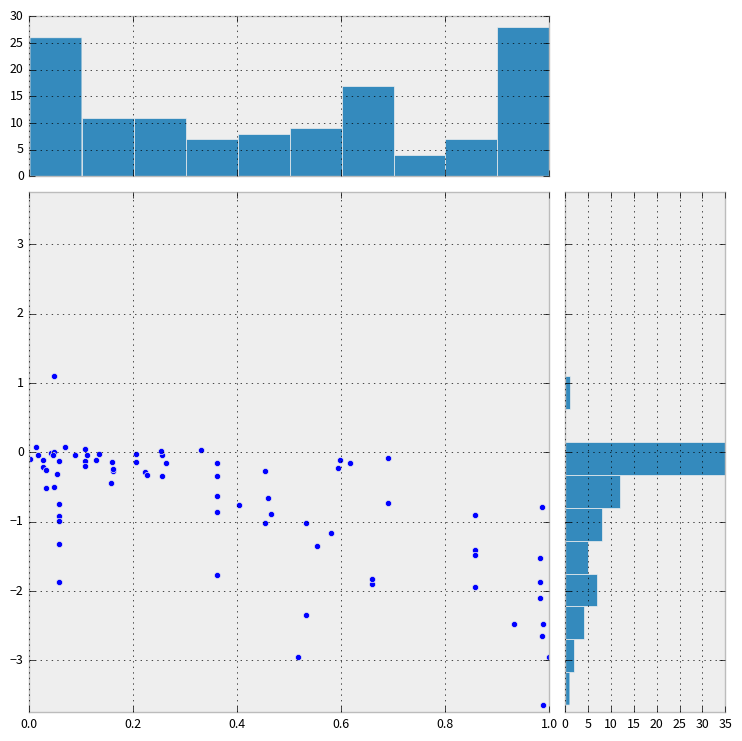

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter


df_for_this = df.drop( 'BglB' ) 

x = df_for_this.conserved
y = df_for_this.target_kcat

# the random data
#x = np.random.randn(1000)
#y = np.random.randn(1000)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((0, 1))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x.dropna() ) 
axHisty.hist(y.dropna(), orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

# `tradeoffs`

Mutants that reveal tradeoffs

In [8]:
# mutations that reveal tradeoffs
cc = [ 'kcat', 'km', 'kcatkm' ] 
collect = []
for c in cc:
    collect.append( [
            len( df[ ( df.target_tm < 0 ) & ( df['target_{}'.format(c)] > 0 ) ] ), 
            len( df[ ( df.target_tm > 0 ) & ( df['target_{}'.format(c)] < 0 ) ] ), 
        ] )
    
print( collect ) 

[[4, 24], [14, 22], [6, 25]]
